**Κατεβάστε το Wine Dataset. Tα δεδομένα αυτά αποτελούν τα αποτελέσματα μιας χημικής ανάλυσης κρασιών από τρεις διαφορετικές καλλιεργητικές ποικιλίες {c1,c2,c3}, και περιλαμβάνουν τιμές για 13 χημικά συστατικά που μετρήθηκαν σε κάθε κρασί. Η πρώτη στήλη του αρχείου των δεδομένων περιλαμβάνει την ετικέτα της ποικιλίας του κάθε κρασιού, και οι επόμενες στήλες τις τιμές των συστατικών που μετρήθηκαν. Στόχος μας είναι να διερευνήσουμε το πρόβλημα της πρόβλεψης της ποικιλίας από τα αποτελέσματα της χημική ανάλυσης.**

Προκειμένου να μην χρειάζεται κάθε φορά να φορτώνω χειροκίνητα το αρχείο που περιέχει τα δεδομένα, συνδέω το google colab με τον λογαριασμό μου στο google drive μέσω της βιβλιοθήκης google.colab. Με την εντολή mount φορτώνονται τα περιεχόμενα του Drive μου. Έπειτα, προσδιορίζω την διεύθυνση του αρχείου wine.data, το οποίο και διαβάζω με την βιβλιοθήκη numpy, ώστε να το αντιμετωπίζω σαν πίνακα, ο οποίος περιέχει δεδομένα τύπου float.

Εάν δεν θέλω να συνδεθώ στο Drive, αλλά να φορτώσω χειροκίνητα το αρχείο wine.data, χρησιμοποιώ την τελευταία εντολή του κελιού.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# Πρέπει να αλλάξει ανάλογα με την θέση του αρχείου Data_ex1 στο Google Drive
# Διαφορετικά να βγει από σχόλιο η τελευταία γραμμή του κελιού
file_path_winedata = '/content/gdrive/MyDrive/Colab Notebooks/Pattern Recognition/HW 02/wine.data'

import numpy as np
data = np.loadtxt(file_path_winedata, dtype=float, encoding=None, delimiter=",")
labels = data[:, 0]

del file_path_winedata

# Εάν θέλουμε να ανεβάσουμε χειροκίνητα το αρχείο Data_ex1.txt
# file = np.loadtxt('wine.data', dtype=float, encoding=None, delimiter=",")

Mounted at /content/gdrive


# **Ερώτημα Α**

**Θεωρείστε το υποσύνολο των δεδομένων που περιέχει τιμές μόνο για τα 5 πρώτα συστατικά και για τα κρασιά από τις ποικιλίες c2 και c3.**

Από τα αρχικά μου δεδομένα κρατάω εκείνα που ανήκουν στην κλάση c2 και c3. Αυτά στην πρώτη στήλη του πίνακα των δεδομένων η οποία προσδιορίζει την κλάση έχουν τιμή 2 ή 3. Έπειτα, κρατάω μονάχα τα 5 πρώτα χαρακτηριστικά αυτών. Δεδομένου ότι η πρώτη στήλη είναι οι ετικέτες, το πρώτο χαρακτηριστικό βρίσκεται στην στήλη 1, σύμφωνα με την αρίθμηση του προγράμματος.

In [2]:
# Κρατάω μονο τις στήλες με τιμή 2 ή 3
dataA = data[np.logical_or(data[:, 0] == 2, data[:, 0] == 3)]
labelsA = labels[np.logical_or(data[:, 0] == 2, data[:, 0] == 3)]

dataA = dataA[:, 1:6] # Κρατάω μονάχα τα 5 πρώτα χαρακτηριστικά

**Να χωρίσετε το παραπάνω σε σύνολο εκπαίδευσης, επικύρωσης και δοκιμής (training, validation & test sets) με αναλογία 50%, 25% και 25% αντίστοιχα, με τυχαία επιλογή δεδομένων και ίδια αναλογία μεταξύ των κλάσεων σε κάθε σύνολο.**

Προκείμενου να διατηρηθεί η αναλογία της εκφώνησης ως προς τα δεδομένα κάθε set, το size του validation set θα πρέπει να είναι το 33.33% του 75% του αρχικού train set. Η τιμή αυτή προκύπτει εύκολα με απλή αναλογία.

In [3]:
from sklearn.model_selection import train_test_split

# Διαχωρισμός σε training και test set
training, testing, train_labels, test_labels = train_test_split(dataA, labelsA, test_size=0.25, stratify=labelsA)

# Διαχωρισμός του training set σε training και validation set
training, validation, train_labels, validation_labels = train_test_split(training, train_labels, test_size=0.33, stratify=train_labels)

# **Ερώτημα Β**


**Χρησιμοποιήστε γραμμικό SVM για να εκπαιδεύσετε ταξινομητή που να διαχωρίζει την κλάση c2 από τη c3. Χρησιμοποιήστε το validation set για να ρυθμίσετε την παράμετρο C (box constraint) κατάλληλα.**


Η παράμετρος C στον γραμμικό ταξινομητή SVM είναι κρίσιμης σημασίας, καθώς ρυθμίζει την ισορροπία μεταξύ της επίτευξης ενός μεγάλου περιθωρίου διαχωρισμού και της μείωσης των σφαλμάτων ταξινόμησης.

Για χαμηλή τιμή του C, το μοντέλο τείνει να ευνοεί την μεγιστοποίηση του περιθωρίου, ακόμη και εάν αυτό σημαίνει την αύξηση των σφαλμάτων ταξινόμησης.

Αντίθετα, η επιλογή μιας υψηλής τιμής του C οδηγεί σε μεγαλύτερη έμφαση στη σωστή ταξινόμηση των εκπαιδευτικών δειγμάτων, μειώνοντας το σφάλμα ταξινόμησης, αυξάνοντας, όμως, τον κίνδυνο υπερπροσαρμογής (overfitting).

Η επιλογή της τιμής του C αποτελεί ένα σημαντικό βήμα. Η ρύθμιση της παραμέτρου C με το validation set βοηθάει στην εύρεση της ισορροπίας μεταξύ της ακρίβειας και της γενίκευσης.




Εφόσον η διαδικασία της εύρεσης της καλύτερης τιμής της παραμέτρου C πρόκειται να επαναληφθεί στα επόμενα ερωτήματα, ορίζω μία συνάρτηση με όνομα find_best_C που θα υλοποιεί αυτήν την διαδικασία.

Για τον ορισμό του SVM καλώ την αντίστοιχη συνάρτηση της βιβλιοθήκης sklearn. O πυρήνας του μοντέλου είναι όρισμα της συνάρτησης προκειμένου να εξυπηρετούνται οι ανάγκες των επόμενων ερωτημάτων.

Για να βρω την καλύτερη τιμή για το C χρησιμοποιώ την συνάρτηση GridSearch της βιβλιοθήκης. Μετά την αξιολόγηση όλων των πιθανών συνδυασμών παραμέτρων, η GridSearchCV επιλέγει τον συνδυασμό που παρέχει την καλύτερη απόδοση σύμφωνα με έναν συγκεκριμένο μετρικό αξιολόγησης (όπως η ακρίβεια). Σύμφωνα με το documentation, οι τιμές του C πρέπει να είναι σε μορφή λεξικού λιστών. Προκειμένου η ρύθμιση να γίνει με βάση το validation set, δίνω αυτό σαν όρισμα της συνάρτησης fit μαζί με τα αντίστοιχα labels.



In [20]:
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def find_best_C(validation, validation_labels, kernels):
    # Προσδιορισμός πιθανών τιμών για την παράμετρο C
    # parameters = {'C': [0.1, 0.2, 0.3, 0.4,1, 10, 100, 1000]}
    # parameters = {'C': [random.uniform(0.01, 100) for _ in range(200)]}

    # a = [random.uniform(0.01, 100) for _ in range(100)]
    a = [0.01, 0.1, 1, 10, 100, 1000]
    # b = sorted(a)
    # print(b)

    '''
    Με την συνάρτηση GridSearchCV βρίσκω την καλύτερη τιμή για την C δοκιμάζοντας όλες τις τιμές που έχω δώσει.
    '''
    # Ορισμός μοντέλου
    svm_search = SVC(kernel=kernels)
    parameters = {'C': a}
    svm_search = GridSearchCV(svm_search, parameters)

    # # Ρύθμιση με βάση το validation set
    svm_search.fit(validation, validation_labels)
    best_C = svm_search.best_params_

    # # print(best_C['C'])
    # # Υλοποίηση κώδικα που κάνει την αναζήτηση
    # # Χρειάζεται να κάνω global τα training, train_labels
    # print("Ξεκινάει η διαφορετική προσέγγιση.")
    # best_score = 0
    # best_C1 = None
    # for C in a:
    #     svm = SVC(C=C, kernel=kernels)
    #     svm.fit(training, train_labels)
    #     score = accuracy_score(validation_labels, svm.predict(validation))
    #     if score > best_score:
    #         best_score = score
    #         best_C1 = C
    # print(best_C1)
    # return best_C1

    return best_C['C']

**Για την καλύτερη τιμή εφαρμόστε τον ταξινομητή που εκπαιδεύσατε στο test set. Τι σφάλμα ταξινόμησης πετύχατε?**

In [26]:
best_C = find_best_C(validation, validation_labels, 'linear')

# Εκπαίδευση ταξινομητή με best_C στο training set
final_model = SVC(kernel='linear', C=best_C)
final_model.fit(training, train_labels)

# Αξιολόγηση στο test set
predicted_labels = final_model.predict(testing)
accuracy = accuracy_score(test_labels, predicted_labels)
error_rate = 1 - accuracy

print("Σφάλμα Ταξινόμησης:", error_rate, 'με C =', str(best_C))

Σφάλμα Ταξινόμησης: 0.30000000000000004 με C = 0.1


# **Ερώτημα Γ**

**Επαναλάβετε το προηγούμενο για 5 νέους τυχαιοποιημένους διαμερισμούς των δεδομένων, και υπολογίστε τη μέση τιμή και την τυπική απόκλιση του σφάλματος ταξινόμησης στο test set.**

Η διαδικασία αυτή επαναλαμβάνεται για διαφορετικούς τύπους πυρήνα στο επόμενο ερώτημα, οπότε υλοποίησα μία συνάρτηση που να την εκτελεί.

Η συνάρτηση αυτή αποτελείται από τον κώδικα των προηγούμενων ερωτημάτων με την διαφορά ότι η διαδικασία επαναλαμβάνεται για κάθε στοιχείο της λίστας των πυρήνων (kernels). Δημιουργώ ένα λεξικό με κλειδί τον τύπο κάθε πυρήνα και τιμές σε μορφή λίστας το σφάλμα κάθε επανάληψης. Συνολικά έχω 5 επαναλήψεις. Προκειμένου τα συμπεράσματά μου να έχουν βάση θα πρέπει για κάθε τυχαίο διαχωρισμό των δεδομένων να εφαρμόζονται όλοι οι πυρήνες του ταξινομητή και να υπολογίζεται ξεχωριστά η μέση τιμή σφάλματος και η απόκλιση. Επομένως, η επανάληψη που διατρέχει τους πίνακες είναι εμφωλευμένη εντός εκείνης που επαναλαμβάνει ολόκληρη την διαδικασία 5 φορές.

Για τον υπολογισμό της μέσης τιμής και της απόκλισης, μετατρέπω την λίστα των τιμών για κάθε κελί σε πίνακα numpy και χρησιμοποιώ τις αντίστοιχες συναρτήσεις της βιβλιοθήκης.

Τέλος, εκτυπώνω τα αποτελέσματα.




In [34]:
def repeat(dataA, labelsA, kernels):
    best_C_values = {kernel : [] for kernel in kernels}

    results = {kernel : [] for kernel in kernels}

    for i in range(0, 5):
        training, testing, train_labels, test_labels = train_test_split(dataA, labelsA, test_size=0.25, stratify=labelsA)
        training, validation, train_labels, validation_labels = train_test_split(training, train_labels, test_size=0.33, stratify=train_labels)

        for k in kernels:
            # Για κάθε διαχωρισμό των δεδομένων & πυρήνα υπολογίζω το καλύτερο C
            best_C = find_best_C(validation, validation_labels, k)
            if k in best_C_values:
                best_C_values[k].append(best_C)

            # Εκπαίδευση του τελικού μοντέλου με την καλύτερη τιμή C
            final_model = SVC(kernel=k, C=best_C)
            final_model.fit(training, train_labels)

            # Αξιολόγηση στο test set
            predicted_labels = final_model.predict(testing)
            accuracy = accuracy_score(test_labels, predicted_labels)
            error = 1 - accuracy
            results[k].append(error)

    # print("Οι καλύτερες τιμές των C που βρέθηκαν είναι:")
    # for key, value in best_C_values.items():
    #     if value:
    #         print("Kernel: ", key)
    #         for c in value:
    #             print("  - C value: ", c)
    #     print()

    print(" KERNEL\t\tΜΕΣΗ ΤΙΜΗ ΣΦΑΛΜΑΤΟΣ \tΑΠΟΚΛΙΣΗ")
    print("-----------------------------------------------------")
    for key, values in results.items():
        mean = np.mean(values)
        standard_deviation = np.std(values)

        formatted_text = "{:^8}".format(key)
        print(formatted_text , "\t    ", "{:.5f}".format(mean), "\t\t", "{:.5f}".format(standard_deviation))

In [35]:
repeat(dataA, labelsA, ['linear'])

 KERNEL		ΜΕΣΗ ΤΙΜΗ ΣΦΑΛΜΑΤΟΣ 	ΑΠΟΚΛΙΣΗ
-----------------------------------------------------
 linear  	     0.14667 		 0.06864


# **Ερώτημα Δ**

**Επαναλάβετε το Γ για μη-γραμμικό SVM δοκιμάζοντας διάφορες συναρτήσεις πυρήνα (RBF, polynomial κλπ). Τι σφάλμα πετύχατε? Ποιος είναι ο καλύτερος ταξινομητής για το πρόβλημα? Σχολιάστε.**

In [38]:
repeat(dataA, labelsA, ['linear', 'poly', 'rbf', 'sigmoid'])

 KERNEL		ΜΕΣΗ ΤΙΜΗ ΣΦΑΛΜΑΤΟΣ 	ΑΠΟΚΛΙΣΗ
-----------------------------------------------------
 linear  	     0.15333 		 0.05812
  poly   	     0.13333 		 0.04714
  rbf    	     0.14667 		 0.03399
sigmoid  	     0.38000 		 0.04000


Η απόφαση του καλύτερου ταξινομητή προκύπτει από τους δύο προαναφερόμενους δείκτες: την μέση τιμή σφάλματος και την απόκλιση. Η μέση τιμή δείχνει το πόσο καλά ταξινομούνται τα δεδομένα , άρα όσο χαμηλότερη τόσο το καλύτερο. Η απόκλιση προσδιορίζει την σταθερότητα του ταξινομητή στις διάφορες εκτελέσεις. Μικρή απόκλιση σημαίνει ότι ο ταξινομητής έχει συνεπή αποτελέσματα ανεξάρτητα από το δείγμα των δεδομένων που χρησιμοποιεί.

Με βάση τα παραπάνω αποτελέσματα, ο πολυωνυμικός ταξινομητής έχει την χαμηλότερη μέση τιμή σφάλματος, δηλαδή κατά μέσο όρο ταξινομεί καλύτερα τα δεδομένα, και μικρή απόκλιση, δηλαδή παρουσιάζει συνεπή αποτελέσματα. Οι υπόλοιποι πυρήνες έχουν υψηλότερη μέση τιμή σφάλματος, δηλαδή παρουσιάζουν περισσότερα λάθη στην ταξινόμηση. Συνεπώς, δεδομένου της ακρίβειας και της συνέπειας ο πολυωνυμικός ταξινομητής είναι καλύτερος για τα συγκεκριμένα δεδομένα. Από αυτό συμπεραίνω ότι η δομή των δεδομένων είναι πολύπλοκη

# **Ερώτημα Ε**

**Χρησιμοποιήστε γραμμικό SVM για να εκπαιδεύσετε ταξινομητές για το πλήρες πρόβλημα των 3 κλάσεων, με την προσέγγιση ένας-εναντίον-ενός (one-vs-one) και καταμέτρηση ψήφων. Μπορείτε να αξιοποιήσετε τις σχετικές αυτοματοποιημένες λειτουργίες που έχουν κάποιες βιβλιοθήκες SVM.**

Η προσέγγιση one vs one είναι μία τεχνική που χρησιμοποιείται σε προβλήματα ταξινόμησης πολλών κλάσεων. Για Ν>2 κλάσεις δημιουργούνται (Ν*(Ν-1))/2 ταξινομητές. Έκαστος εκπαιδεύεται σε δεδομένα δύο κλάσεω, αγνοώντας τα δεδομένα από τις υπόλοιπες. Όταν πρόκειται να γίνει πρόβλεψη για νέο δείγμα, αυτό παρουσιάζεται σε όλους τους ταξινομητές. Κάθε ταξινομητής ψηφίζει για μία κλάση. Η τελική πρόβλεψη είναι η κλάση με τις περισσότερες ψήφους.

Η υλοποίηση της τεχνικής αυτής γίνεται με την βοήθεια της έτοιμης συνάρτησης OneVsOneClassifier από την βιβλιοθήκη sklearn.


**Θέτοντας το C=1 και ακολουθώντας πρωτόκολλο 5-fold cross validation, να υπολογίστε τη μέση τιμή του σφάλματος ταξινόμησης χρησιμοποιώντας τα 5 πρώτα χαρακτηριστικά όπως και παραπάνω.**

Το πρωτόκολλο 5-fold cross validation είναι μία μέθοδο αξιολόγησης της απόδοσης ενός μοντέλου μηχανικής μάθησης με βάση το πόσο καλά γενικεύει σε νέα δεδομένα.



In [9]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


def oneVSone(data, labels):
    svm_model = OneVsOneClassifier(SVC(kernel='linear', C=1))

    accuracy = cross_val_score(svm_model, data, labels, cv=5, scoring='accuracy')

    error = 1 - accuracy.mean()
    print('Mean error: ', error*100, "%")

    # Πίνακας σύγχυσης
    predicted_labels = cross_val_predict(svm_model, data, labels, cv=5)
    cm = confusion_matrix(labels, predicted_labels)

    ConfusionMatrixDisplay.from_predictions(labels, predicted_labels)
    plt.title('Confusion Matrix')
    plt.show()

Στον πίνακα σύγχυσης η κύρια διαγώνιος δείχνει τις περιπτώσεις όπου οι πραγματικές κλάσεις έχουν προβλεφθεί σωστά, ενώ οι εκτός διαγωνίου τιμές αντιπροσωπεύουν λανθασμένες προβλέψεις.

Mean error:  18.523809523809533 %


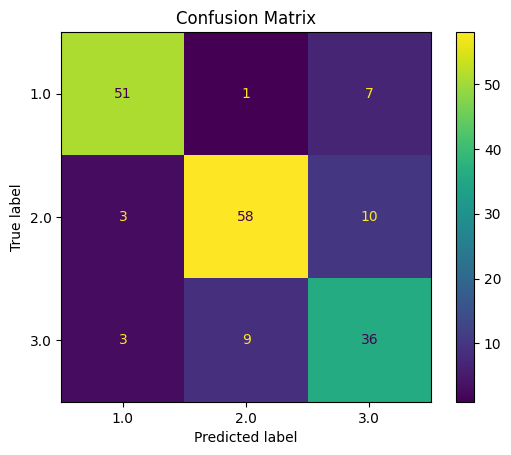

In [10]:
oneVSone(data[:, 1:6], labels) # Δίνω μόνο τα 5 πρώτα χαρακτηριστικά

Η κλάση 1 έχει προβλεφθεί σωστά 51 φορές και λανθασμένα 1 φορά ως κλάση 2 και 7 φορές ως κλάση 3.

Η κλάση 2 έχει προβλεφθεί σωστά 58 φορές και λανθασμένα 3 φορές ως κλάση 1 και 10 φορές ως κλάση 3.

Η κλάση 3 έχει προβλεφθεί σωστά 36 φορές και λανθασμένα 3 φορές ως κλάση 1 και 9 φορές ως κλάση 2.


Mean error:  1.1111111111111072 %


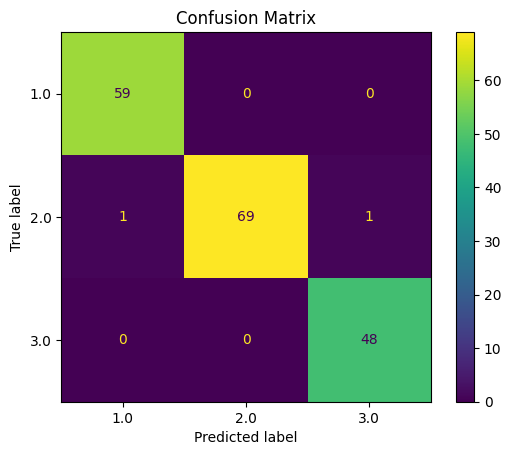

In [11]:
oneVSone(data, labels)

Η κλάση 1 έχει προβλεφθεί σωστά 59 φορές και καμία φορά λανθασμένη ως κλάση 2 ή 3.

Η κλάση 2 έχει προβλεφθεί σωστά 69 φορές και λανθασμένα 1 φορές ως κλάση 1 και 1 φορά ως κλάση 3.

Η κλάση 3 έχει προβλεφθεί σωστά 48 φορές και λανθασμένα καμία φορά λανθασμένη ως κλάση 1 ή 2.


Συγκρίνοντας τους δύο πίνακες, φαίνεται ότι οι κλάσεις 2 και 3 στον πρώτο πίνακα έχουν τον υψηλότερο αριθμό σωστών προβλέψεων και τον χαμηλότερο αριθμό λανθασμένων προβλέψεων σε σχέση με την άλλη κλάση. Στον δεύτερο πίνακα, οι κλάσεις 2 και 3 φαίνεται να έχουν σχετικά υψηλό αριθμό λανθασμένων προβλέψεων η μία σε σχέση με την άλλη. Αυτό δείχνει ότι οι κλάσεις 2 και 3 είναι πιο δύσκολο να διαχωριστούν χρησιμοποιώντας μόνο τα 5 χαρακτηριστικά, σε σύγκριση με την χρήση όλων των διαθέσιμων χαρακτηριστικών.